# Gaussian Mixture Models



Gaussian Mixture Models (GMM) are a sophisticated statistical approach for clustering, commonly used in the field of machine learning and data science. They stand out for their ability to capture more complex cluster shapes than simpler models like K-Means, as they assume that the data is generated from a mixture of several Gaussian distributions with unknown parameters.

At the core of GMM is the concept of probability densities. A Gaussian, or normal distribution, is defined by its mean and variance, dictating the shape of the distribution curve. In a GMM, each cluster is modeled as a Gaussian distribution, and points are assigned to clusters based on the probability of them belonging to these Gaussian distributions.

One significant advantage of GMM over K-Means is its flexibility in terms of cluster covariance. This allows the shape of the clusters to be varied, accommodating elongated or rotated clusters, unlike K-Means, which assumes spherical clusters. GMM achieves this by using Expectation-Maximization (EM) for determining the parameters that maximize the likelihood of the data.

The "Iris Species" dataset from Kaggle is an exemplary dataset for demonstrating the capabilities of GMM clustering. This dataset, a classic in machine learning, contains 150 observations of iris flowers from three different species. Each observation includes four features: the length and the width of the sepals and petals.

What makes the Iris dataset particularly suitable for GMM is its well-defined features and compact size. The dataset's structure allows for clear demonstration of how GMM can identify and differentiate between the clusters based on the Gaussian distributions. Each species in the dataset tends to cluster around certain values of sepal length, sepal width, petal length, and petal width, making it an ideal case for GMM.


###1. Load the Dataset and Libraries
The Iris dataset is loaded into a pandas DataFrame, which is a crucial first step in any data analysis.

In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### 2. Data Preprocessing
The Iris dataset typically doesn't require extensive preprocessing. This step involves a simple check for missing values.



In [6]:
# Checking for missing values
if df.isnull().any().any():
    df.dropna(inplace=True)

###3. Feature Scaling
Even though the features in the Iris dataset are usually on a similar scale, scaling is performed as a good practice. This ensures that all features contribute equally to the analysis.

In [7]:
from sklearn.preprocessing import StandardScaler

# Scaling features
scaler = StandardScaler()
features = df.columns[:-1]  # Assuming the last column is the target
df_scaled = scaler.fit_transform(df[features])

###4. Applying Gaussian Mixture Models (GMM)
In this step, Gaussian Mixture Models are applied to the scaled data. The number of components is set to 3, corresponding to the number of Iris species.

In [8]:
from sklearn.mixture import GaussianMixture

# Applying GMM
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(df_scaled)
labels = gmm.predict(df_scaled)

###5. GMM Labeling and Clustering Analysis
After applying GMM, labels are assigned to each data point, and the DataFrame is updated with these labels for further analysis.

In [9]:
# GMM labeling and cluster analysis
df['GMM_Cluster'] = labels

###6. Generating Plots for GMM Cluster Analysis
This step involves visualizing the clustering results using scatter plots and pair plots to provide insights into the distribution and separation of clusters.

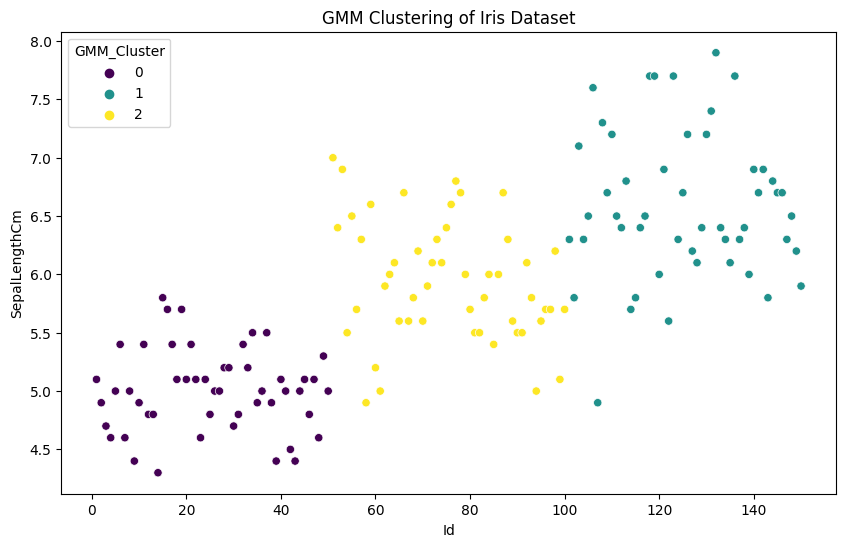

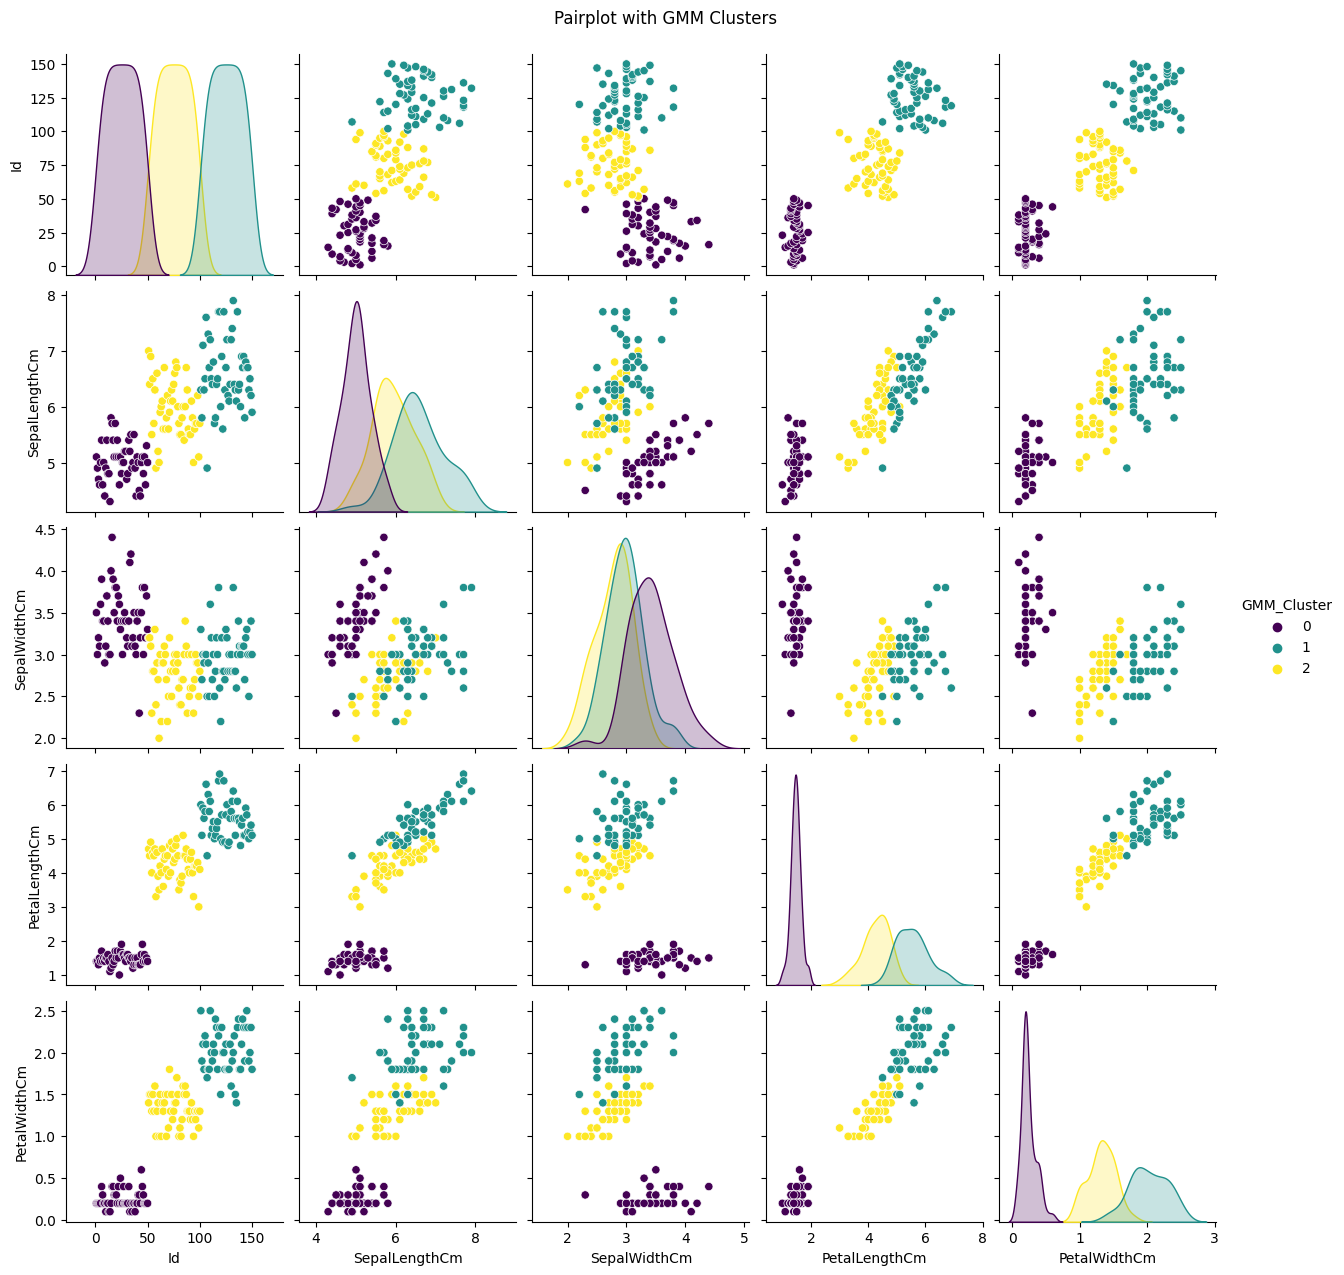

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for GMM clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df[features[0]], y=df[features[1]], hue=df['GMM_Cluster'], palette='viridis')
plt.title('GMM Clustering of Iris Dataset')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.show()
print()
# Pairplot for the entire dataset with GMM cluster hue
sns.pairplot(df, hue='GMM_Cluster', palette='viridis')
plt.suptitle('Pairplot with GMM Clusters', y=1.02)
plt.show()

### 7. Display Cluster Analysis
The final step provides a statistical overview of each cluster, aiding in the interpretation of the clustering results.

In [11]:
# Displaying cluster analysis
cluster_analysis = df.groupby('GMM_Cluster').mean()
cluster_analysis

<ipython-input-11-632ce0a7daf8>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_analysis = df.groupby('GMM_Cluster').mean()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
GMM_Cluster,,,,,
0,25.5,5.006,3.418,1.464,0.244
1,125.5,6.588,2.974,5.552,2.026
2,75.5,5.936,2.770,4.260,1.326
